In [2]:
# Imports
import io
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

import load_data as ld
import analysis as ana

from PIL import Image

In [3]:
# Values of interest
date_name = "created_at"
ppm_name = "PM2.5_ATM_ug/m3"

# Load data
data = ld.load_data(date_name, ppm_name)

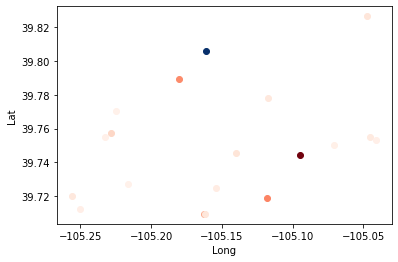

In [6]:
padding = 0.01

reference_location = "Arvada"
for location in np.unique(data["location"]):
    selected_df = data[data["location"] == location]
    lat = selected_df["lat"].iloc[0]
    long = selected_df["long"].iloc[0]

    rmse = ana.get_rmse(data, reference_location, location, date_name, ppm_name) / 170 # TODO Make this dynamic
    if location == reference_location:
        color = cm.Blues(1.0)
    else:
        color = cm.Reds(rmse)
    plt.scatter(long, lat, c=[color])
    plt.xlabel("Long")
    plt.ylabel("Lat")
plt.show()

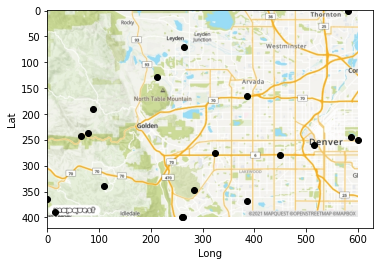

In [48]:
imageStream = io.BytesIO(response.content)
image = Image.open(imageStream)
plt.imshow(image)
plt.plot()

reference_location = "Arvada"
for location in np.unique(data["location"]):
    selected_df = data[data["location"] == location]
    lat = selected_df["lat"].iloc[0]
    lat = 400 - 400 * (lat - np.min(data["lat"])) / (np.max(data["lat"]) - np.min(data["lat"]))  # Make negative

    long = selected_df["long"].iloc[0]
    long = 600 * (long - np.min(data["long"])) / (np.max(data["long"]) - np.min(data["long"]))

    rmse = ana.get_rmse(data, reference_location, location, date_name, ppm_name) / 170 # TODO Make this dynamic
    if location == reference_location:
        color = cm.Greys(1.0)
    else:
        # color = cm.Greys(rmse)
        color = cm.Greys(1.0)
    plt.scatter(long, lat, c=[color])
    plt.xlabel("Long")
    plt.ylabel("Lat")
plt.show()

In [49]:
import requests

upper_left = str(np.min(data["lat"])) + "," + str(np.min(data["long"]))
lower_right = str(np.max(data["lat"])) + "," + str(np.max(data["long"]))
coords = lower_right + "," + upper_left
print(coords)

key = "wTPDkAtbI9q93RXHsKO1JwWxsFfB4Ao2"
query = "https://open.mapquestapi.com/staticmap/v5/map?key=" + key + "&boundingBox=" + coords + "&size=600,400"  # TODO: Normalize size

# response = requests.get(query)

39.826463,-105.040846,39.709429,-105.255924


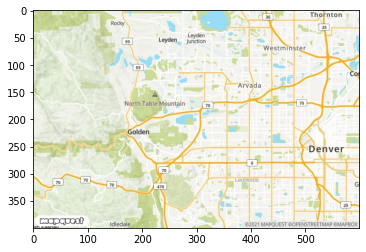

In [25]:
imageStream = io.BytesIO(response.content)
image = Image.open(imageStream)
plt.imshow(image)
plt.plot()

image.save("images/org_data.jpg")

In [16]:
print(coords)

39.709429,-105.255924,39.826463,-105.040846
